In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Task 3 and 4_Loan_Data.csv")
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


<Axes: xlabel='default', ylabel='count'>

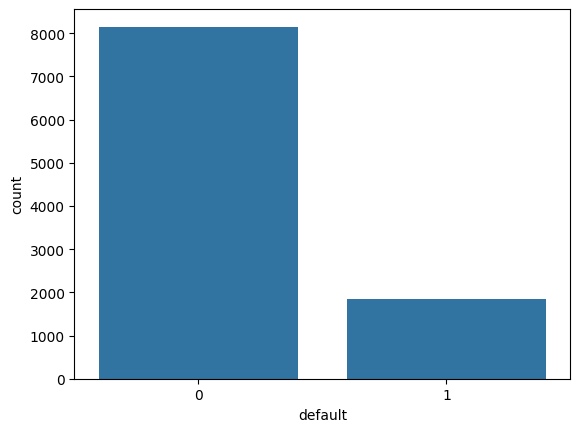

In [3]:
# check if data is balance
sns.countplot(df,x=df.default)

<Axes: xlabel='credit_lines_outstanding', ylabel='count'>

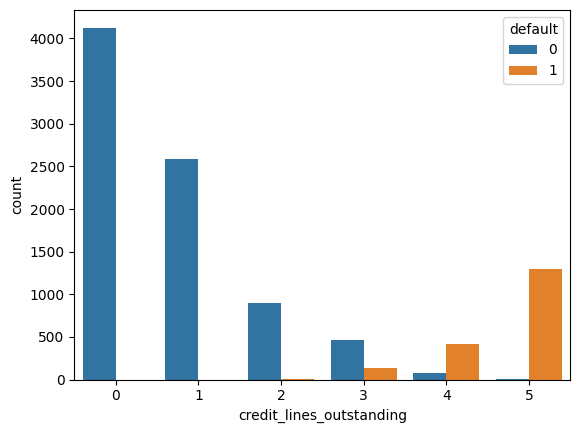

In [4]:
sns.countplot(df,x="credit_lines_outstanding",hue="default")

<Axes: xlabel='years_employed', ylabel='count'>

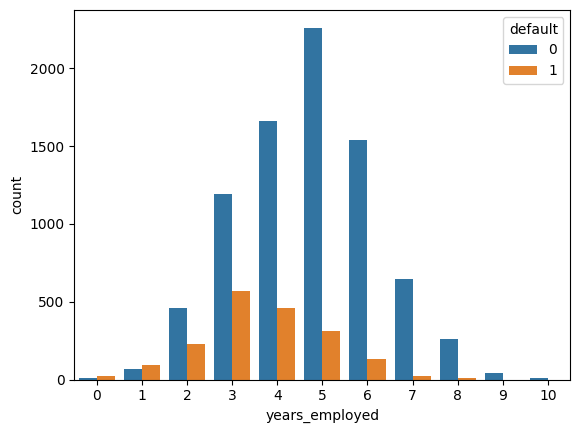

In [5]:
sns.countplot(df,x="years_employed",hue="default")


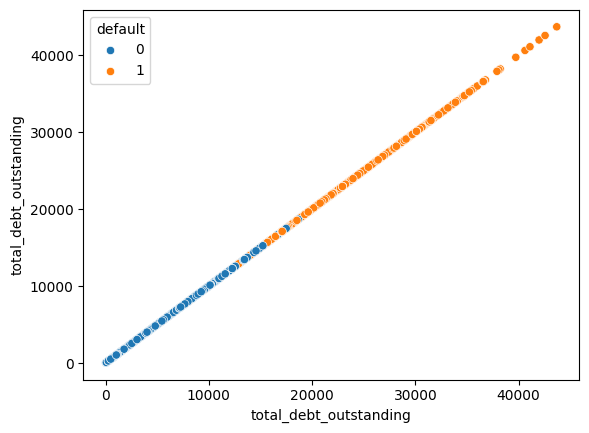

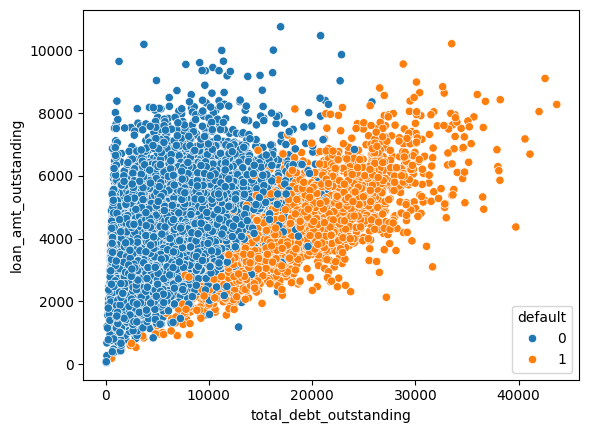

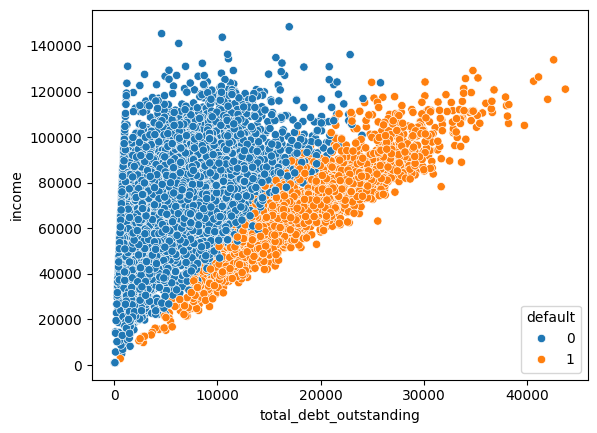

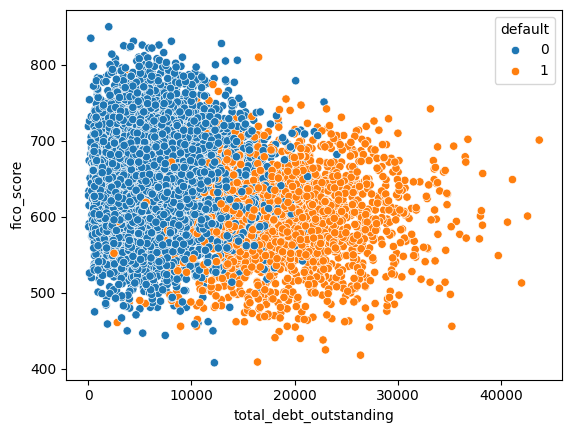

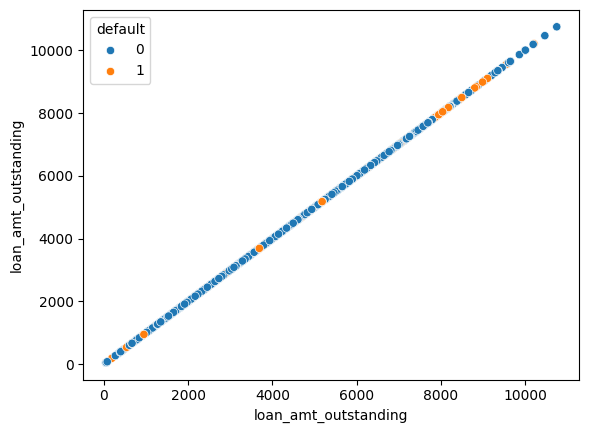

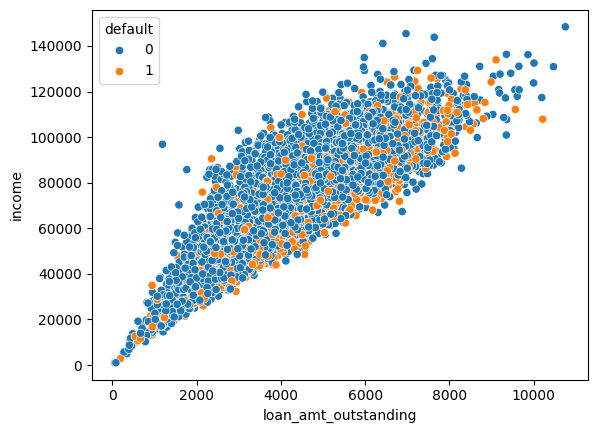

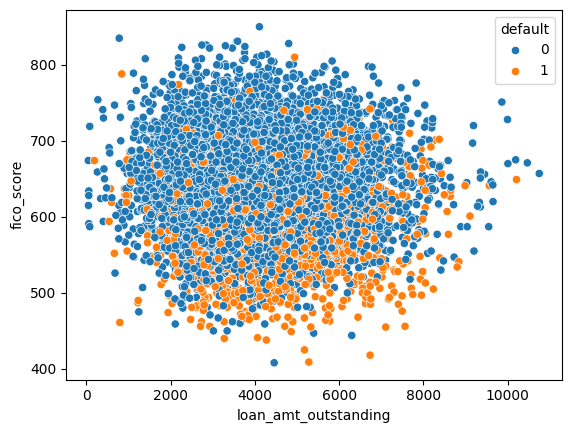

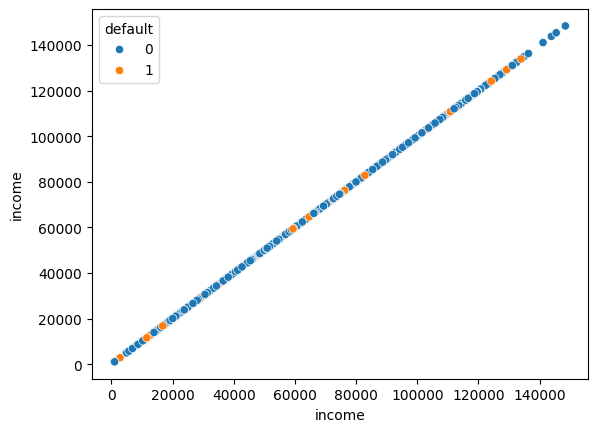

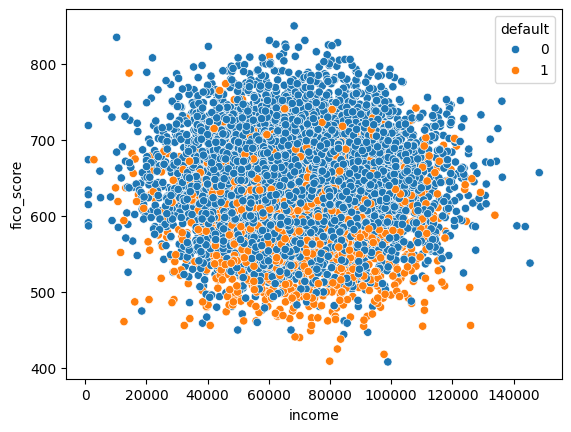

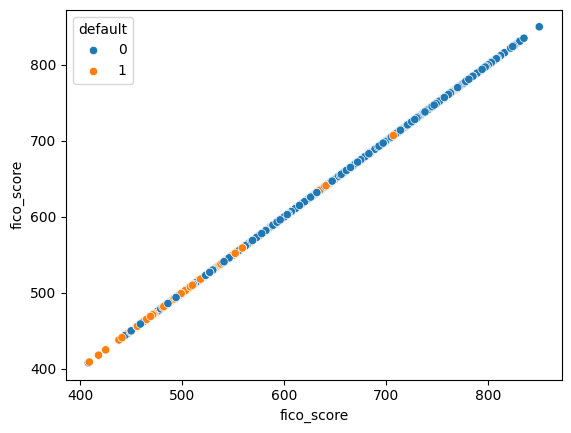

In [8]:
numeric_columns = ["total_debt_outstanding","loan_amt_outstanding","income","fico_score"]

for i in range(len(numeric_columns)):
  for j in range(i,len(numeric_columns)):
    plt.figure()
    sns.scatterplot(x=df[numeric_columns[i]],y=df[numeric_columns[j]],hue=df.default)
    plt.plot()



Inferences

*   People with outstanding debt more than 20K are defaulting
*   No linear separable pattern is visible for loan amount, income
*   People with low fico score are more likely to default
*   Higher number of credit lines => more likely to default
*   people emoplyed for higher tenure are less likely to default ( < 5 yrs)





In [9]:
df.drop(["customer_id"],axis=1,inplace=True)
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0


In [10]:
X = df.drop(["default"],axis=1)
y = df['default']

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,0,5221.545193,3915.471226,78039.38546,5,605
1,5,1958.928726,8228.752520,26648.43525,2,572
2,0,3363.009259,2027.830850,65866.71246,4,602
3,0,4766.648001,2501.730397,74356.88347,5,612
4,1,1345.827718,1768.826187,23448.32631,6,631


In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

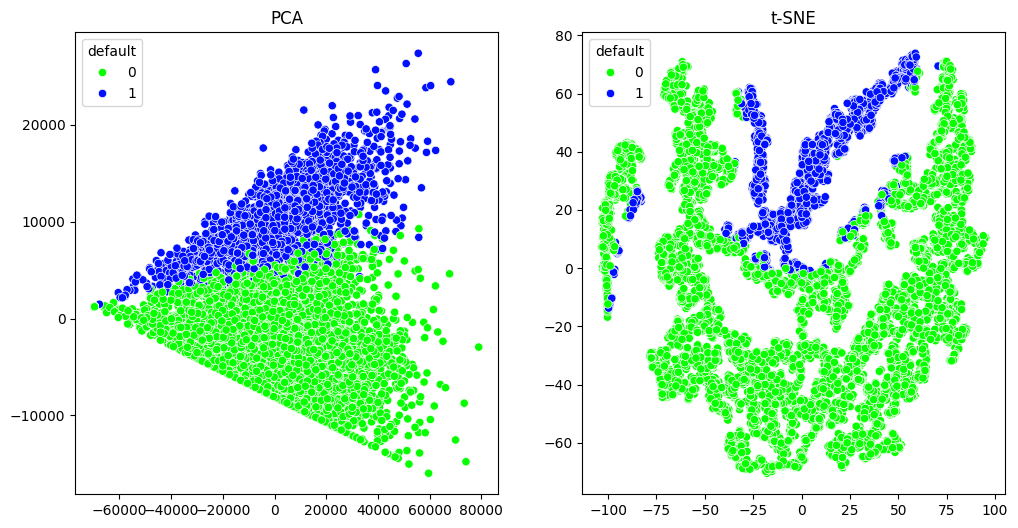

In [15]:


# Plot PCA result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=sns.color_palette("hsv", 2))
plt.title('PCA')

# Plot t-SNE result
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=sns.color_palette("hsv", 2))
plt.title('t-SNE')

plt.show()


## Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42, stratify=y)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

array([[-0.25952525, -0.70733017, -0.4263669 , -0.88786784,  0.28920875,
         0.64304194],
       [-0.83333344,  0.97259067, -0.20107054,  0.95004768, -0.98845691,
         0.88701978],
       [-0.25952525,  0.20097983,  0.01665629,  1.29401842,  0.92804157,
         0.04122993],
       ...,
       [-0.83333344, -1.27493014, -1.20133447,  0.14647999,  0.28920875,
        -0.02383083],
       [-0.83333344,  0.61548228, -0.17911898,  1.39013566, -0.98845691,
        -0.93468144],
       [ 2.03570751,  0.12293106,  0.91426342, -0.95076976, -1.62728973,
        -0.96721182]])

In [35]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9986666666666667
Confusion Matrix:
[[2445    0]
 [   4  551]]


In [59]:
def expected_loss_fn(input_features, recovery_rate, model):
    EAD = input_features[1]
    transformed_features = scaler.transform([input_features])
    probablity_default = model.predict(transformed_features)

    print(f"Probablity Deafualt : ", probablity_default[0])

    LGD = (1 - recovery_rate) * EAD
    expected_loss = probablity_default * LGD

    # print(f"Expected Loss : ", expected_loss[0])
    return expected_loss



In [60]:
import warnings
warnings.filterwarnings("ignore")

input_features = [3,2000,8000,5000,3,600]
expected_loss = expected_loss_fn(input_features, 0.1, model_lr)
print(f"Expected Loss : ", expected_loss[0])

 Probablity Deafualt :  1
Expected Loss :  1800.0


## Random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9963333333333333
Confusion Matrix:
[[2439    6]
 [   5  550]]


In [74]:
input_features = [3,2000,8000,5000,3,600]
expected_loss = expected_loss_fn(input_features, 0.1, model_rf)
print(f"Expected Loss : ", expected_loss[0])

 Probablity Deafualt :  1
Expected Loss :  1800.0


### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [78]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.985
Confusion Matrix:
[[2438    7]
 [  38  517]]


In [81]:
input_features = [3,2000,8000,5000,3,600]
expected_loss = expected_loss_fn(input_features, 0.1, model_knn)
print(f"Expected Loss : ", expected_loss[0])

 Probablity Deafualt :  0
Expected Loss :  0.0


## SVM

In [82]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [83]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.998
Confusion Matrix:
[[2443    2]
 [   4  551]]


In [84]:
input_features = [3,2000,8000,5000,3,600]
expected_loss = expected_loss_fn(input_features, 0.1, model)
print(f"Expected Loss : ", expected_loss[0])

 Probablity Deafualt :  1
Expected Loss :  1800.0


Logistic Regression works best with Highest accuracy, precision and recall.